In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time

from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
plt.style.use('fivethirtyeight')
%matplotlib inline 

## **Loading data** 

In [ ]:
df_Confirmed=pd.read_csv("/content/time_series_covid_19_confirmed.csv")
df_deaths=pd.read_csv("/content/time_series_covid_19_deaths.csv")
df_recovered=pd.read_csv("/content/time_series_covid_19_recovered.csv")
df_covid19_confirmed=pd.read_csv("/content/time_series_covid19_confirmed_global_narrow.csv")
df=df_covid19_confirmed
df = df.drop(['Province/State'], axis=1)
df_Confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5


In [ ]:
df=df.drop(df[df['Date']!= "2020-03-30"].index, inplace = False) 
df

,Country/Region,Lat,Long,Date,Value
1,Afghanistan,33.0,65.0,2020-03-30,170
70,Albania,41.1533,20.1683,2020-03-30,223
139,Algeria,28.0339,1.6596,2020-03-30,584
208,Andorra,42.5063,1.5218,2020-03-30,370
277,Angola,-11.2027,17.8739,2020-03-30,7
...,...,...,...,...,...
17182,Venezuela,6.4238,-66.5897,2020-03-30,135
17251,Vietnam,16.0,108.0,2020-03-30,203
17320,West Bank and Gaza,31.9522,35.2332,2020-03-30,116
17389,Zambia,-15.4167,28.2833,2020-03-30,35


In [ ]:
df_r.loc[(df_r["Country/Region"]=="China")]


,Province/State,Country/Region,Lat,Long,Date,Value
2899,Anhui,China,31.8257,117.2264,2020-03-30,984
2900,Anhui,China,31.8257,117.2264,2020-03-29,984
2901,Anhui,China,31.8257,117.2264,2020-03-28,984
2902,Anhui,China,31.8257,117.2264,2020-03-27,984
2903,Anhui,China,31.8257,117.2264,2020-03-26,984
...,...,...,...,...,...,...
5171,Zhejiang,China,29.1832,120.0934,2020-01-26,1
5172,Zhejiang,China,29.1832,120.0934,2020-01-25,1
5173,Zhejiang,China,29.1832,120.0934,2020-01-24,1
5174,Zhejiang,China,29.1832,120.0934,2020-01-23,0


In [ ]:
df_c=df

In [ ]:
df_d=pd.read_csv("/content/time_series_covid19_deaths_global_narrow.csv")

In [ ]:
df_r=pd.read_csv("/content/time_series_covid19_recovered_global_narrow.csv")

In [ ]:
df_r = df_r.drop(['Lat','Long','Province/State'], axis=1)
df_r=df_r.drop(df_r[df_r['Date']!= "2020-03-30"].index, inplace = False) 

In [ ]:
df_c.rename(columns={'Value': 'Confirmed'}, inplace=True)
df_d.rename(columns={'Value': 'Deaths'}, inplace=True)
df_r.rename(columns={'Value': 'Recovered'}, inplace=True)

In [ ]:
df_c.head()

,Country/Region,Lat,Long,Date,Confirmed
1,Afghanistan,33.0,65.0,2020-03-30,170
70,Albania,41.1533,20.1683,2020-03-30,223
139,Algeria,28.0339,1.6596,2020-03-30,584
208,Andorra,42.5063,1.5218,2020-03-30,370
277,Angola,-11.2027,17.8739,2020-03-30,7


In [ ]:
df = [df_c["Country/Region"], df_c["Confirmed"], df_d["Deaths"], df_r["Recovered"]]

In [ ]:
headers = ["Country/Region", "Confirmed","Deaths","Recovered"]
df_covid19 = pd. concat(df, axis=1, keys=headers)


In [ ]:
df_r.head()

,Country/Region,Date,Recovered
1,Afghanistan,2020-03-30,2
70,Albania,2020-03-30,44
139,Algeria,2020-03-30,37
208,Andorra,2020-03-30,10
277,Angola,2020-03-30,0


In [ ]:
col = df_Confirmed.keys()

In [ ]:
Dates=col[4:]

In [ ]:
confirmed_cases = df_Confirmed.loc[:, col[4]:col[-1]]
deaths_cases = df_deaths.loc[:, col[4]:col[-1]]
recovered_cases = df_recovered.loc[:, col[4]:col[-1]]


In [ ]:
world_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active =[]
china_cases = [] 
italy_cases = []
us_cases = [] 
spain_cases = [] 
morocco_cases = []

for i in Dates:
    confirmed_sum = confirmed_cases[i].sum()
    death_sum = deaths_cases[i].sum()
    recovered_sum = recovered_cases[i].sum()
    
    # confirmed, deaths, recovered, and active
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)
    
    # calculate rates
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)

    # case studies 
    china_cases.append(df_Confirmed[df_Confirmed['Country/Region']=='China'][i].sum())
    italy_cases.append(df_Confirmed[df_Confirmed['Country/Region']=='Italy'][i].sum())
    us_cases.append(df_Confirmed[df_Confirmed['Country/Region']=='US'][i].sum())
    spain_cases.append(df_Confirmed[df_Confirmed['Country/Region']=='Spain'][i].sum())
    morocco_cases.append(df_Confirmed[df_Confirmed['Country/Region']=='Morocco'][i].sum())


In [ ]:
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

world_daily_increase = daily_increase(world_cases)
china_daily_increase = daily_increase(china_cases)
italy_daily_increase = daily_increase(italy_cases)
us_daily_increase = daily_increase(us_cases)
spain_daily_increase = daily_increase(spain_cases)
morocco_daily_increase = daily_increase(morocco_cases)

In [ ]:
days_since_1_22 = np.array([i for i in range(len(Dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)
italy_cases = np.array(italy_cases).reshape(-1, 1)
morocco_cases = np.array(morocco_cases).reshape(-1, 1)

In [ ]:
days_in_future = 10
future_forcast = np.array([i for i in range(len(Dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-10]

In [ ]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [ ]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, us_cases, test_size=0.10, shuffle=False) 

Slope: [136.64331759]
Intercept: -2489.461202185794
Root mean squared error:  14616086.360287888
R2 score:  0.27700222454858037


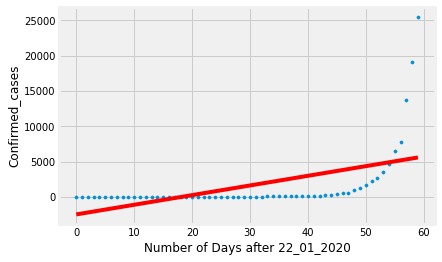

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Model initialization
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(X_train_confirmed, y_train_confirmed)
# Predict
y_predicted = regression_model.predict(X_train_confirmed)

# model evaluation
rmse = mean_squared_error(y_train_confirmed, y_predicted)
r2 = r2_score(y_train_confirmed, y_predicted)

# printing values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

# plotting values

# data points
plt.scatter(X_train_confirmed, y_train_confirmed, s=10)
plt.xlabel('Number of Days after 22_01_2020')
plt.ylabel('Confirmed_cases')

# predicted values
plt.plot(X_train_confirmed, y_predicted, color='r')
plt.show()

In [ ]:
# Make a prediction for Cyprus
X_new = [[69]]  # Days
print(regression_model.predict(X_new)) # outputs [[243823.85909091]]

[6938.9277114]


Il s'avère que la regression linéare ne peut pas prédire le nombre de  cas à venir

In [ ]:
# Fitting Polynomial Regression to the dataset 
from sklearn.preprocessing import PolynomialFeatures 
  
poly = PolynomialFeatures(degree = 6) 
X_poly = poly.fit_transform(X_train_confirmed) 
  
poly.fit(X_poly, y_train_confirmed) 
regression_model.fit(X_poly, y_train_confirmed) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

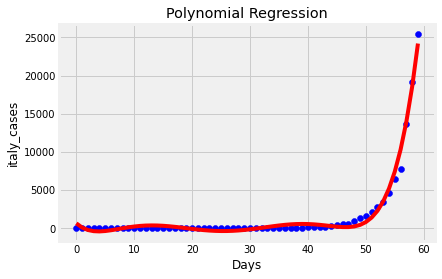

In [ ]:
# Visualising the Polynomial Regression results 
plt.scatter(X_train_confirmed, y_train_confirmed, color = 'blue') 
  
plt.plot(X_train_confirmed, regression_model.predict(poly.fit_transform(X_train_confirmed)), color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Days') 
plt.ylabel('italy_cases') 
  
plt.show() 

On remarque qu'il y'a un problème de Overfitting.


In [ ]:
# Predicting a new result with Polynomial Regression 
regression_model.predict(poly.fit_transform([[69]])) 


array([188660.74499501])

Visulialisation d'augmentation de cas dans le monde


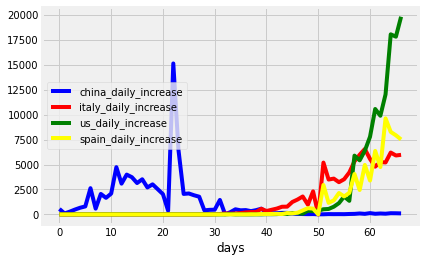

In [ ]:
plt.plot(days_since_1_22,china_daily_increase, color='blue')
plt.xlabel("days")
plt.plot(days_since_1_22,italy_daily_increase, color='red')
plt.xlabel("days")
plt.plot(days_since_1_22,us_daily_increase, color='green')
plt.plot(days_since_1_22,spain_daily_increase, color='yellow')
plt.legend(["china_daily_increase","italy_daily_increase","us_daily_increase","spain_daily_increase"])

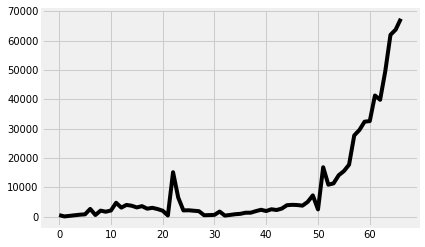

In [ ]:
plt.plot(days_since_1_22,world_daily_increase, color='black')


In [ ]:
import sklearn.linear_model
lrModelRidge = sklearn.linear_model.Ridge(alpha=10**(-10000))
lrModelRidge.fit(X_train_confirmed, y_train_confirmed)
theta0ridge, theta1ridge = lrModelRidge.intercept_, lrModelRidge.coef_

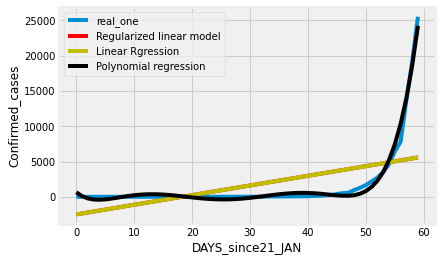

In [ ]:

plt.xlabel("days")
plt.ylabel('us_confirmed_cases')

plt.plot(X_train_confirmed, y_train_confirmed)
plt.xlabel('Number of Days after 22_01_2020')
plt.ylabel('Confirmed_cases')

plt.plot(X_train_confirmed, theta0ridge + theta1ridge * X_train_confirmed, "r", label="Regularized linear model on sample data")

plt.plot(X_train_confirmed, y_predicted, color='y')
plt.plot(X_train_confirmed, regression_model.predict(poly.fit_transform(X_train_confirmed)), color = 'black') 
plt.legend(["real_one","Regularized linear model","Linear Rgression","Polynomial regression"])

plt.xlabel("DAYS_since21_JAN")
#save_fig('ridge_model_plot')
plt.show()



Slope: [129.44967097]
Intercept: -2277.2486268316206
Root mean squared error:  14631606.613425998
R2 score:  0.27623450135533323


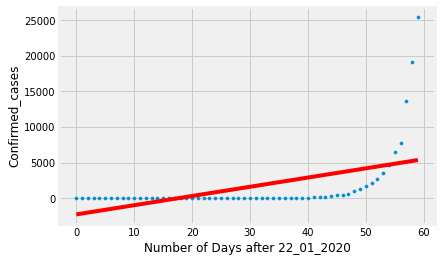

In [ ]:

# Model initialization
lrModelRidge = sklearn.linear_model.Ridge(alpha=10**3)
# Fit the data(train the model)
lrModelRidge.fit(X_train_confirmed, y_train_confirmed)
# Predict
y_predicted = lrModelRidge.predict(X_train_confirmed)

# model evaluation
rmse = mean_squared_error(y_train_confirmed, y_predicted)
r2 = r2_score(y_train_confirmed, y_predicted)

# printing values
print('Slope:' ,lrModelRidge.coef_)
print('Intercept:', lrModelRidge.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

# plotting values

# data points
plt.scatter(X_train_confirmed, y_train_confirmed, s=10)
plt.xlabel('Number of Days after 22_01_2020')
plt.ylabel('Confirmed_cases')

# predicted values
plt.plot(X_train_confirmed, y_predicted, color='r')
plt.show()

In [ ]:

# transform our data for polynomial regression
poly = PolynomialFeatures(degree=5)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forcast = poly.fit_transform(future_forcast)
# bayesian ridge polynomial regression
tol = [1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4]

bayesian_grid = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2}

bayesian = BayesianRidge(fit_intercept=False, normalize=True)
bayesian_search = RandomizedSearchCV(bayesian, bayesian_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesian_search.fit(poly_X_train_confirmed, y_train_confirmed)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    1.4s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=BayesianRidge(alpha_1=1e-06, alpha_2=1e-06,
                                           alpha_init=None, compute_score=False,
                                           copy_X=True, fit_intercept=False,
                                           lambda_1=1e-06, lambda_2=1e-06,
                                           lambda_init=None, n_iter=300,
                                           normalize=True, tol=0.001,
                                           verbose=False),
                   iid='deprecated', n_iter=40, n_jobs=-1,
                   param_distributions={'alpha_1': [1e-07, 1e-06, 1e-05,
                                                    0.0001],
                                        'alpha_2': [1e-07, 1e-06, 1e-05,
                                                    0.0001],
                                        'lambda_1': [1e-07, 1e-06, 1e-05,
                                                 

In [ ]:
bayesian_search.best_params_

{'alpha_1': 1e-05,
 'alpha_2': 1e-05,
 'lambda_1': 0.0001,
 'lambda_2': 1e-07,
 'tol': 0.0001}

In [ ]:
bayesian_confirmed = bayesian_search.best_estimator_
test_bayesian_pred = bayesian_confirmed.predict(poly_X_test_confirmed)
bayesian_pred = bayesian_confirmed.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_bayesian_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_bayesian_pred, y_test_confirmed))

MAE: 32712.89895304884
MSE: 1413994612.295721


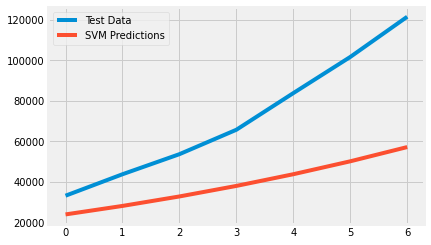

In [ ]:
plt.plot(y_test_confirmed)
plt.plot(test_bayesian_pred)
plt.legend(['Test Data', 'SVM Predictions'])

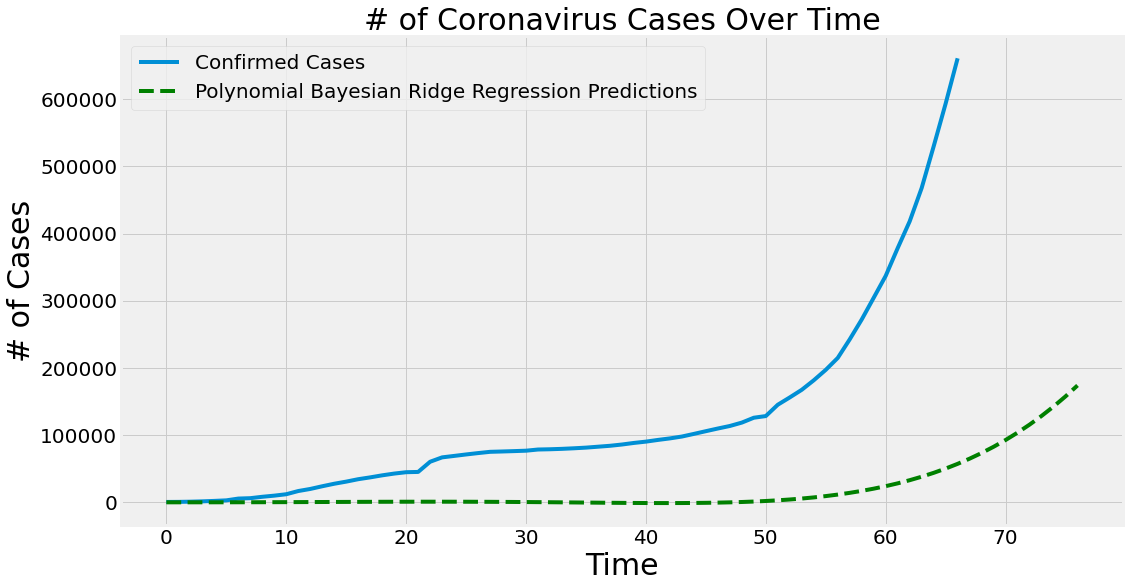

In [ ]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forcast, bayesian_pred, linestyle='dashed', color='green')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Confirmed Cases', 'Polynomial Bayesian Ridge Regression Predictions'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

NameError: ignored

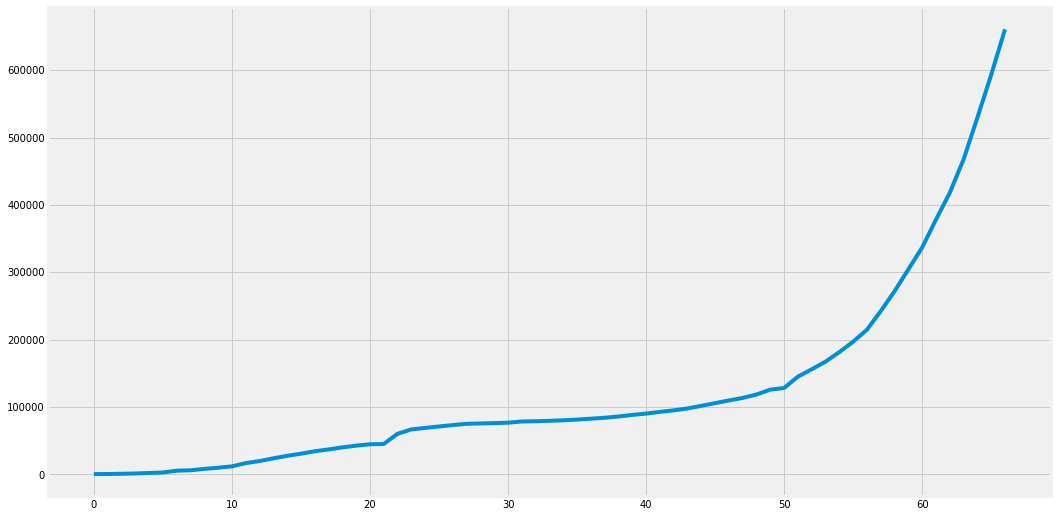

In [ ]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forcast, svm_pred, linestyle='dashed', color='purple')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Confirmed Cases', 'SVM predictions'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

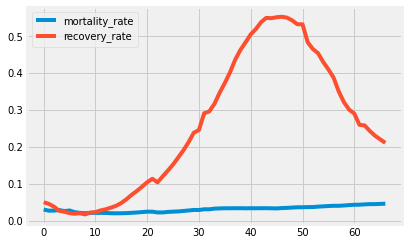

In [ ]:
plt.plot(days_since_1_22,mortality_rate)
plt.plot(days_since_1_22, recovery_rate)
plt.legend(["mortality_rate","recovery_rate"])

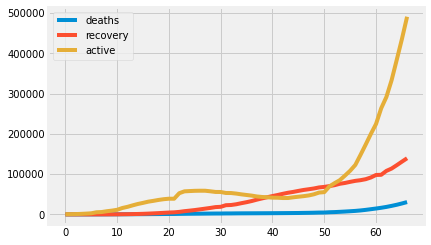

In [ ]:
plt.plot(days_since_1_22,total_deaths)
plt.plot(days_since_1_22, total_recovered)
plt.plot(days_since_1_22,total_active)
plt.legend(["deaths","recovery","active"])

In [ ]:
df_covid19.head(2)


,Country/Region,Confirmed,Deaths,Recovered
1,Afghanistan,170,4,2
70,Albania,223,11,44


In [ ]:
df_covid19 = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv")
df_table = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_time.csv",parse_dates=['Last_Update'])

In [ ]:
df_table.head(2)


,Country_Region,Last_Update,Confirmed,Deaths,Recovered,Active,Delta_Confirmed,Delta_Recovered
0,Afghanistan,2020-01-22,0,0,NaN,NaN,0,NaN
1,Afghanistan,2020-01-23,0,0,NaN,NaN,0,NaN


In [ ]:
df_countries_cases = df_covid19.copy().drop(['Lat','Long_','Last_Update'],axis =1)
df_countries_cases.index = df_countries_cases["Country_Region"]
df_countries_cases = df_countries_cases.drop(['Country_Region'],axis=1)

df_continents_cases = df_covid19.copy().drop(['Lat','Long_','Country_Region','Last_Update'],axis =1)

In [ ]:
df_countries_cases.head()

,Confirmed,Deaths,Recovered,Active
Country_Region,,,,
Australia,4862,20,422,4420
Austria,10418,146,1436,8836
Canada,8591,102,1592,0
China,82359,3316,76382,2661
Denmark,3043,90,78,2875


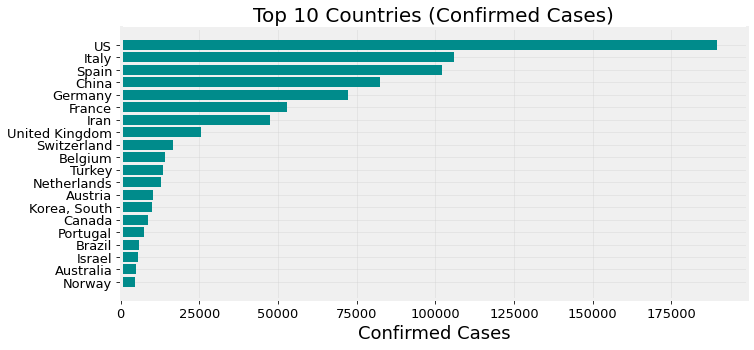

In [ ]:
f = plt.figure(figsize=(10,5))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_countries_cases.sort_values('Confirmed')["Confirmed"].index[-20:],df_countries_cases.sort_values('Confirmed')["Confirmed"].values[-20:],color="darkcyan")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Confirmed Cases",fontsize=18)
plt.title("Top 10 Countries (Confirmed Cases)",fontsize=20)
plt.grid(alpha=0.3)
plt.savefig('Top 10 Countries (Confirmed Cases).png')

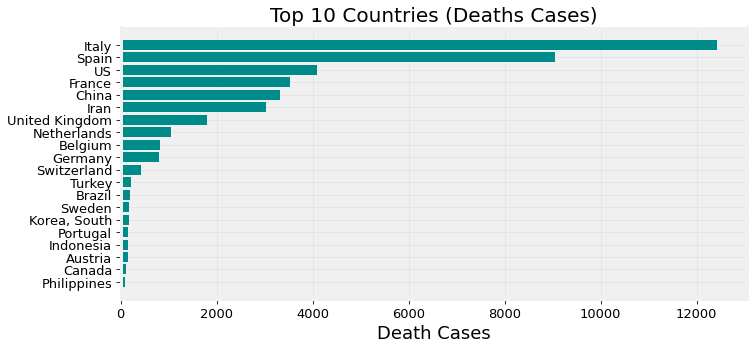

In [ ]:
f = plt.figure(figsize=(10,5))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_countries_cases.sort_values('Deaths')["Deaths"].index[-20:],df_countries_cases.sort_values('Deaths')["Deaths"].values[-20:],color="darkcyan")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Death Cases",fontsize=18)
plt.title("Top 10 Countries (Deaths Cases)",fontsize=20)
plt.grid(alpha=0.3)
plt.savefig('Top 10 Countries (Deaths Cases).png')

In [ ]:
import folium  

world_map = folium.Map(location=[10,0], tiles="cartodbpositron", zoom_start=2,max_zoom=6,min_zoom=2)
for i in range(0,len(df_Confirmed)):
    folium.Circle(
        location=[df_Confirmed.iloc[i]['Lat'], df_Confirmed.iloc[i]['Long']],
        tooltip = "<h5 style='text-align:center;font-weight: bold'>"+df_Confirmed.iloc[i]['Country/Region']+"</h5>"+
                    "<div style='text-align:center;'>"+str(np.nan_to_num(df_Confirmed.iloc[i]['Province/State']))+"</div>"+
                    "<hr style='margin:10px;'>"+
                    "<ul style='color: #444;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
        "<li>Confirmed: "+str(df_Confirmed.iloc[i,-1])+"</li>"+
        "<li>Deaths:   "+str(df_deaths.iloc[i,-1])+"</li>"+
        "<li>Mortality Rate:   "+str(np.round(df_deaths.iloc[i,-1]/(df_Confirmed.iloc[i,-1]+1.00001)*100,2))+"</li>"+
        "</ul>"
        ,
        radius=(int((np.log(df_Confirmed.iloc[i,-1]+1.00001)))+0.2)*50000,
        color='#eb0f32',
        fill_color='#f30757',
        fill=True).add_to(world_map)

world_map


In [ ]:
df_Confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5


# **Ridge Regression**

In [ ]:
from sklearn.linear_model import Ridge

## training the model

ridgeReg = Ridge(alpha=1, normalize=True)

ridgeReg.fit(X_train_confirmed,y_train_confirmed)

pred = ridgeReg.predict(X_test_confirmed)


mse = np.mean((pred - y_test_confirmed)**2)


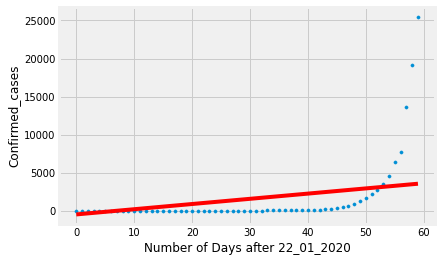

 mean squared error:  16016052.090979807
score:  -5.287208036815423


In [ ]:
from sklearn.linear_model import Ridge

## training the model

ridgeReg = Ridge(alpha=1, normalize=True)

ridgeReg.fit(X_train_confirmed,y_train_confirmed)

pred = ridgeReg.predict(X_train_confirmed)


# plotting values

# data points
plt.scatter(X_train_confirmed, y_train_confirmed, s=10)
plt.xlabel('Number of Days after 22_01_2020')
plt.ylabel('Confirmed_cases')

# predicted values
plt.plot(X_train_confirmed, pred, color='r')
plt.show()

# model evaluation
mse = np.mean((pred - y_train_confirmed)**2)
score = ridgeReg.score(X_test_confirmed,y_test_confirmed)



# printing values

print(' mean squared error: ', mse)
print('score: ', score)



Slope: [136.64331759]
Intercept: -2489.461202185794
Root mean squared error:  14616086.360287888
R2 score:  0.27700222454858037


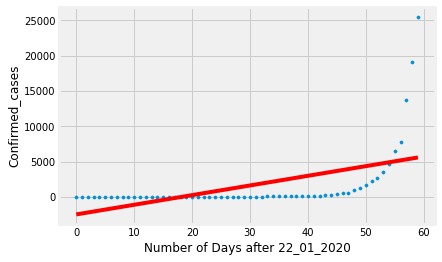

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Model initialization
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(X_train_confirmed, y_train_confirmed)
# Predict
y_predicted = regression_model.predict(X_train_confirmed)

# model evaluation
rmse = mean_squared_error(y_train_confirmed, y_predicted)
r2 = r2_score(y_train_confirmed, y_predicted)

# printing values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

# plotting values

# data points
plt.scatter(X_train_confirmed, y_train_confirmed, s=10)
plt.xlabel('Number of Days after 22_01_2020')
plt.ylabel('Confirmed_cases')

# predicted values
plt.plot(X_train_confirmed, y_predicted, color='r')
plt.show()

Slope: [14654.35714286]
Intercept: -851279.9285714282
Root mean squared error:  16993551.448979374
R2 score:  0.9806008420955793


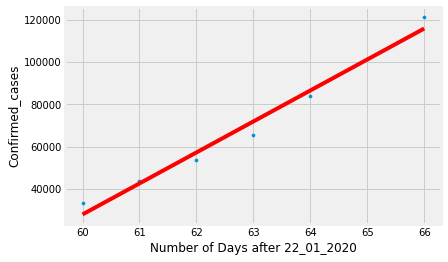

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Model initialization
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(X_test_confirmed, y_test_confirmed)
# Predict
y_predicted = regression_model.predict(X_test_confirmed)

# model evaluation
rmse = mean_squared_error(y_test_confirmed, y_predicted)
r2 = r2_score(y_test_confirmed, y_predicted)

# printing values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

# plotting values

# data points
plt.scatter(X_test_confirmed, y_test_confirmed, s=10)
plt.xlabel('Number of Days after 22_01_2020')
plt.ylabel('Confirmed_cases')

# predicted values
plt.plot(X_test_confirmed, y_predicted, color='r')
plt.show()

In [ ]:
# Make a prediction for Cyprus
X_new = [[69]]  # Days
print(regression_model.predict(X_new)) # outputs [[243823.85909091]]

[159870.71428571]
